# Team ID - PNT2022TMID18129

# Importing The Required Libraries

In [23]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam 
from keras. utils import np_utils
import matplotlib.pyplot as plt


# Loading The Data

In [24]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

In [25]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


# Analyzing The Data

In [26]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

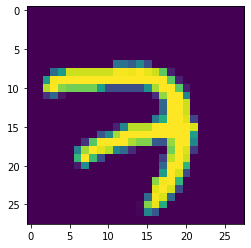

In [27]:
plt.imshow(x_train[5000])  

In [28]:
np.argmax(y_train[6000])

0

# Reshaping The Data

In [29]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [30]:
number_of_classes = 10

# Applying One Hot Encoding

In [31]:
y_train = np_utils.to_categorical (y_train, number_of_classes)
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [32]:
model=Sequential ()

In [33]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))


In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling The Model

In [36]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [37]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


# Train The Model 

In [38]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.3626 - accuracy: 0.9490 - val_loss: 0.0990 - val_accuracy: 0.9698
Epoch 2/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0779 - accuracy: 0.9774 - val_loss: 0.0881 - val_accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.0858 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.1021 - val_accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.1095 - val_accuracy: 0.9743


# Observing The Metrics

In [39]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10948386043310165, 0.9743000268936157]


# Test The Model

In [40]:
prediction=model.predict(x_test[3000:3001])
print(prediction)

1/1 [==============================] - 0s 204ms/step
[[3.6383713e-13 8.2290694e-14 3.7821275e-15 6.5920297e-11 9.8764887e-13
  1.2065794e-06 9.9999881e-01 7.3369471e-22 9.2648600e-09 7.1047206e-14]]


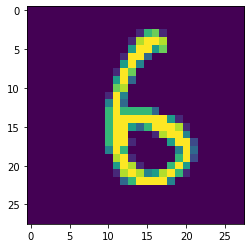

In [41]:
plt.imshow(x_test[3000])

In [42]:
print(np.argmax(prediction, axis=1))

[6]


In [43]:
np.argmax(y_test[3000:3001])

6

# Save The Model

In [34]:
model.save('models/mnistCNN.h5')